In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [120]:
df = pd.read_csv("google.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20-08-2004,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,23-08-2004,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,24-08-2004,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,25-08-2004,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,26-08-2004,2.613952,2.688672,2.606729,2.687676,2.687676,142572401


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4624 non-null   object 
 1   Open       4624 non-null   float64
 2   High       4624 non-null   float64
 3   Low        4624 non-null   float64
 4   Close      4624 non-null   float64
 5   Adj Close  4624 non-null   float64
 6   Volume     4624 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 253.0+ KB


In [122]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4.624000e+03
mean,37.675435,38.062752,37.288269,37.679692,37.679692,1.234169e+08
std,35.246229,35.633783,34.870722,35.251085,35.251085,1.530975e+08
min,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05
25%,12.606124,12.717893,12.423122,12.589436,12.589436,2.982900e+07
50%,24.931799,25.255511,24.722126,25.004821,25.004821,6.799686e+07
75%,53.809000,54.342374,53.163750,53.841751,53.841751,1.545712e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [123]:
df.shape

(4624, 7)

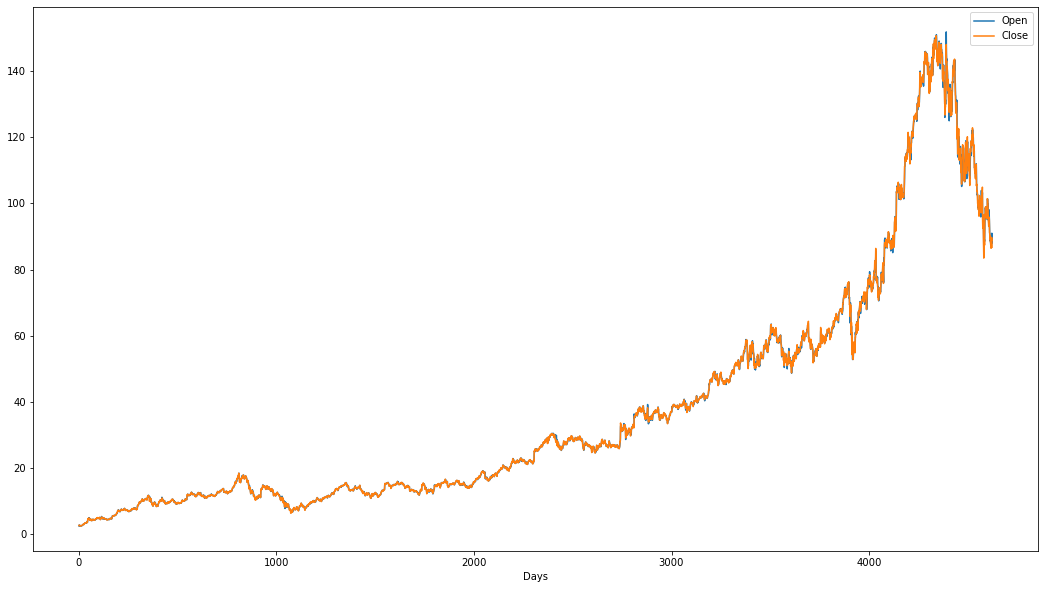

In [124]:
plt.figure(figsize=(18,10))
plt.xlabel('Days')
plt.plot(df['Open'], label ='Open')
plt.plot(df['Close'], label ='Close')
plt.legend()
plt.show()

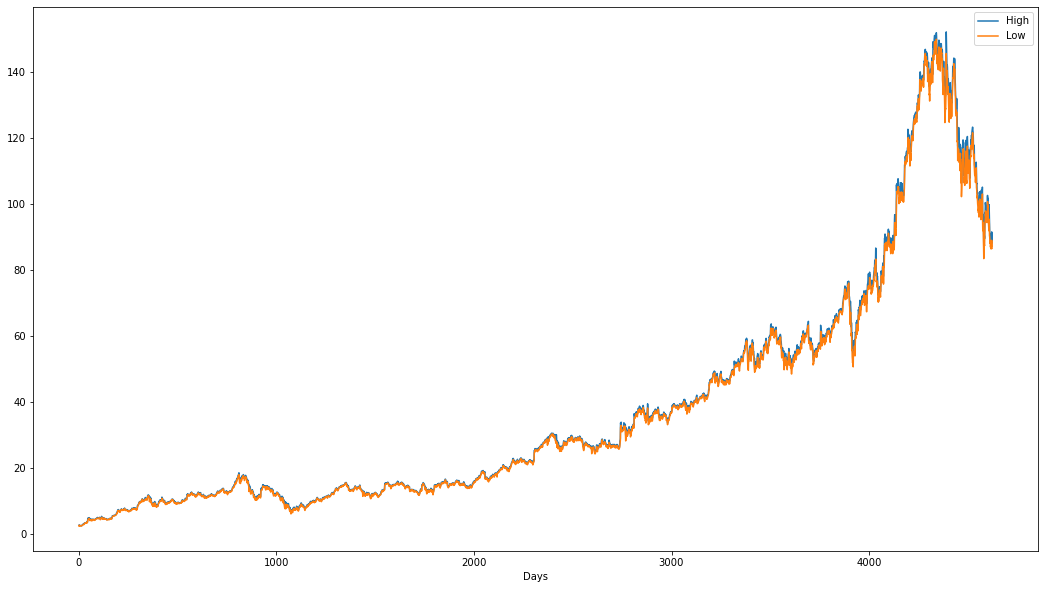

In [125]:
plt.figure(figsize=(18,10))
plt.xlabel('Days')
plt.plot(df['High'], label ='High')
plt.plot(df['Low'], label ='Low')
plt.legend()
plt.show()

In [126]:
new_df = df.drop(['Date', 'Adj Close'], axis=1)

In [127]:
def create_train_test_set(new_df):
    
    features = new_df.drop(columns=['Close'], axis=1)
    target = new_df['Close']
    

    data_len = df.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(new_df)

Historical Stock Data length is -  4624
Training Set length -  4069
Validation Set length -  462
Test Set length -  92
(4069, 4) (462, 4) (93, 4)
(4069,) (462,) (93,)


In [133]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
print("Linear Regression Score ", lr.score(X_train, Y_train).round(4))

Linear Regression Score  0.9999


In [134]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-5.73748217e-01  7.84391627e-01  7.89659448e-01  1.00147217e-12]
LR Intercept: 
 0.00247073656471386


In [136]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [137]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred

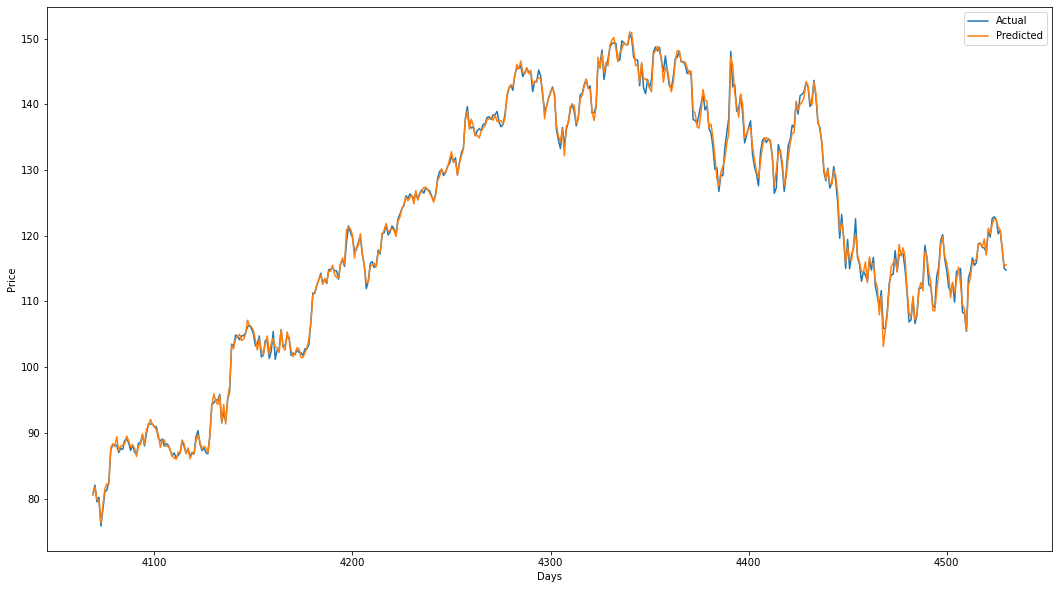

In [132]:
plt.figure(figsize=(18,10))
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df_pred['Actual'], label ='Actual')
plt.plot(df_pred['Predicted'], label ='Predicted')
plt.legend()